In [2]:
import pandas as pd
import numpy as np

In [3]:
data=pd.read_csv("dataset.csv")
data.head()

,Patient ID,Age,Blood Pressure,Cholesterol Levels,Heart Rate,BMI,Diagnosis,Treatment Plan,Recovery Status,Medication Type,Follow-up Requirement
0,101,65,130,250,72,28.0,Hypertension with high cholesterol.,"Medication: Lisinopril (blood pressure), Stati...",Active Recovery,"Lisinopril, Statins.",Quarterly.
1,102,42,110,150,76,24.0,Pre-hypertension.,"Lifestyle modification: Regular exercise, heal...",Recovered,N/A.,Six months.
2,103,58,140,200,80,30.0,Type 2 Diabetes.,Medication: Metformin (blood sugar control). L...,Active Recovery,Metformin.,Quarterly.
3,104,71,160,220,88,32.0,Heart Failure.,"Medication: Digoxin (heart function), Furosemi...",Active Recovery,"Digoxin, Furosemide.",Monthly.
4,105,35,120,180,74,27.0,Overweight.,"Lifestyle modification: Regular exercise, heal...",Recovered,N/A.,Three months.


In [4]:
data.shape

(100, 11)

In [5]:
input=data[['Age','Blood Pressure','Cholesterol Levels','Heart Rate','BMI','Diagnosis']]
input.head()

,Age,Blood Pressure,Cholesterol Levels,Heart Rate,BMI,Diagnosis
0,65,130,250,72,28.0,Hypertension with high cholesterol.
1,42,110,150,76,24.0,Pre-hypertension.
2,58,140,200,80,30.0,Type 2 Diabetes.
3,71,160,220,88,32.0,Heart Failure.
4,35,120,180,74,27.0,Overweight.


In [6]:
input['Diagnoses']=input['Diagnosis'].apply(
    lambda x: 1 if 'Hypertension' in x else 0
)

C:\Users\SUPRATIM NAG\AppData\Local\Temp\ipykernel_19172\1518081550.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  input['Diagnoses']=input['Diagnosis'].apply(


In [7]:
input.head()

,Age,Blood Pressure,Cholesterol Levels,Heart Rate,BMI,Diagnosis,Diagnoses
0,65,130,250,72,28.0,Hypertension with high cholesterol.,1
1,42,110,150,76,24.0,Pre-hypertension.,0
2,58,140,200,80,30.0,Type 2 Diabetes.,0
3,71,160,220,88,32.0,Heart Failure.,0
4,35,120,180,74,27.0,Overweight.,0


In [8]:
input.drop(axis=1,columns='Diagnosis',inplace=True)

C:\Users\SUPRATIM NAG\AppData\Local\Temp\ipykernel_19172\2096392200.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  input.drop(axis=1,columns='Diagnosis',inplace=True)


In [9]:
input.describe()

,Age,Blood Pressure,Cholesterol Levels,Heart Rate,BMI,Diagnoses
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,49.210000,126.100000,199.850000,79.380000,26.970000,0.310000
std,13.121264,15.018171,37.121524,7.947784,4.255015,0.464823
min,25.000000,95.000000,120.000000,60.000000,18.000000,0.000000
25%,39.750000,115.000000,177.500000,75.000000,24.000000,0.000000
50%,50.000000,125.000000,200.000000,80.000000,27.000000,0.000000
75%,60.000000,135.000000,226.250000,85.000000,30.000000,1.000000
max,75.000000,160.000000,300.000000,110.000000,40.000000,1.000000


In [10]:
features=input[['Age','Blood Pressure','Cholesterol Levels','Heart Rate','BMI']]
features.shape

(100, 5)

In [11]:
target=input[['Diagnoses']]
target.shape

(100, 1)

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [13]:
x_train,x_test,y_train,y_test=train_test_split(features,target,test_size=0.20)

In [14]:
model=DecisionTreeClassifier(criterion='gini',max_depth=7)

In [15]:
model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=7)

In [16]:
model.score(x_train,y_train)

0.975

In [17]:
model.score(x_test,y_test)

0.5

In [18]:
model.feature_importances_

array([0.19701972, 0.07472819, 0.29481542, 0.12924183, 0.30419484])

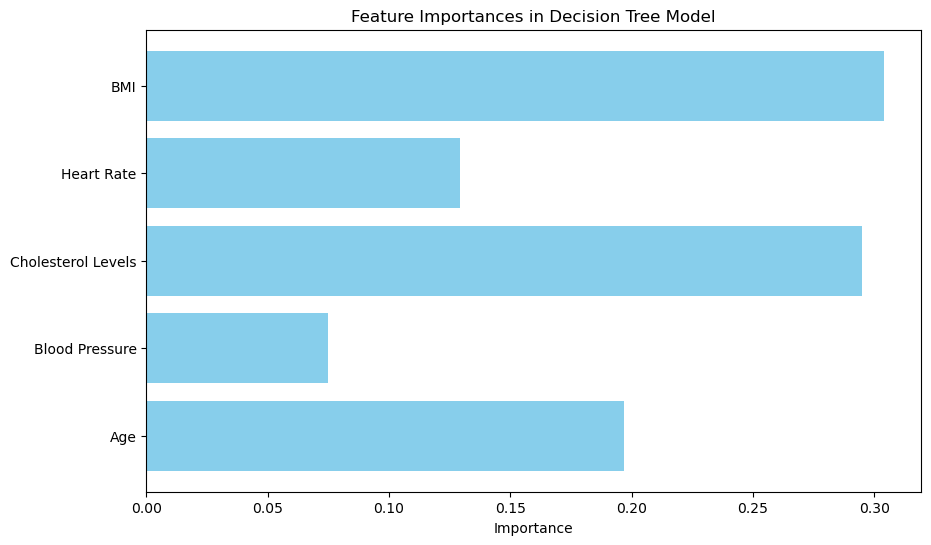

In [44]:
import matplotlib.pyplot as plt

# Get feature importances from the model
importances = model.feature_importances_
feature_names = features.columns

# Create a bar graph
plt.figure(figsize=(10, 6))
plt.barh(feature_names, importances, color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importances in Decision Tree Model')
plt.show()


In [38]:
print(model.predict([[125,80,200,70,28]]))

[1]


C:\Users\SUPRATIM NAG\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [39]:
y_pred=model.predict(x_test)

In [40]:
y_pred

array([0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1],
      dtype=int64)

In [41]:
from sklearn.metrics import classification_report, accuracy_score
# Display Classification Report and Accuracy
print("Classification Report:")
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.55      0.55        11
           1       0.44      0.44      0.44         9

    accuracy                           0.50        20
   macro avg       0.49      0.49      0.49        20
weighted avg       0.50      0.50      0.50        20

Accuracy: 50.00%


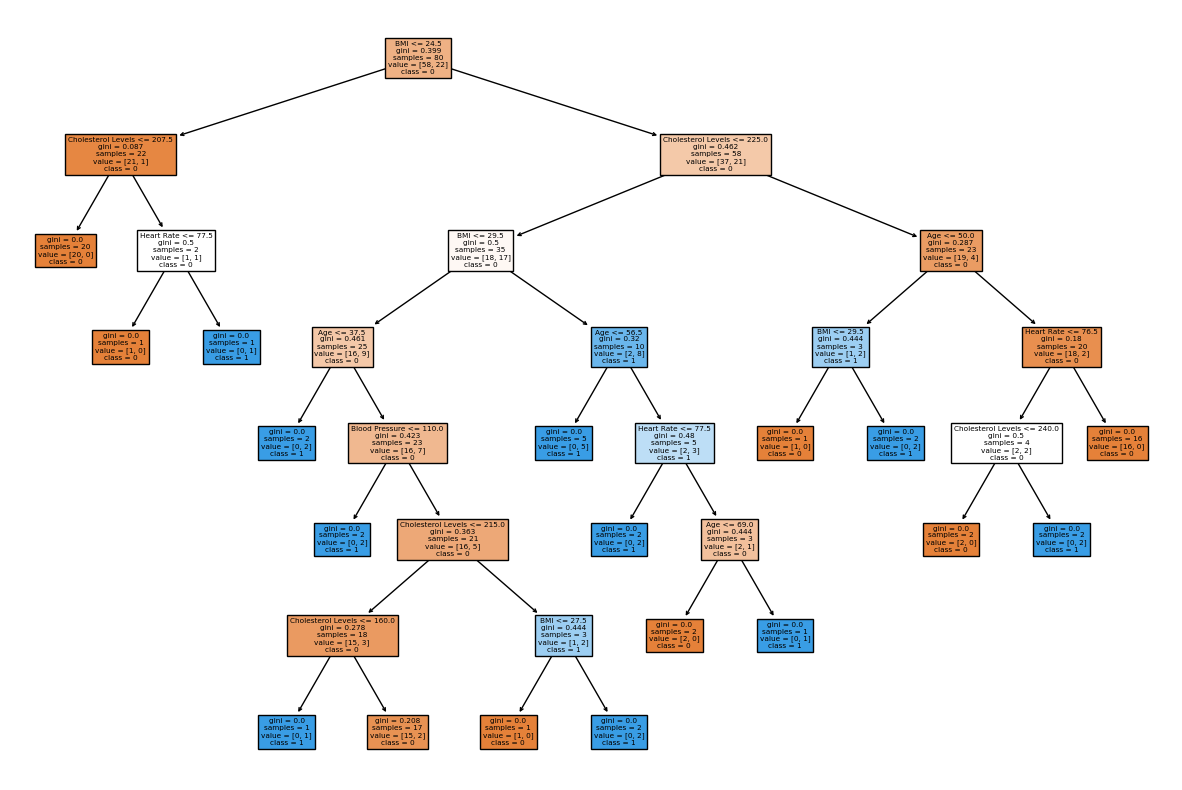

In [42]:
# Plot the Decision Tree
from sklearn.tree import DecisionTreeClassifier, plot_tree
plt.figure(figsize=(15, 10))
plot_tree(model, filled=True, feature_names=features.columns, class_names=model.classes_.astype(str))
plt.show()